# Assignment 4 WBT 
# Name: Moses Mbabaali 
# Matricola: 4846019

In [1]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD, Adam, Adagrad, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Get the data
with open("semeion.data") as textFile:
    data = [line.split() for line in textFile]

In [3]:
# Just reconverted the original data into this way it was way easier operating in this mode 
data = np.asarray(data)
data = data.astype(float)

In [4]:
# The x values 
X = data[:,:-10]
print(X.shape)
X

(1593, 256)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
# The y values 
y = data[:,-10:]
print(y.shape)
y

(1593, 10)


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [6]:
# Matrix as a 16 by 16 for an individual element
X[0].reshape((16,16))

array([[0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,

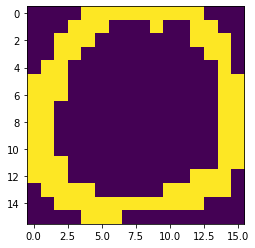

In [7]:
# Visualizing the 16x16 matrix as image
plt.imshow(X[7].reshape((16,16)))

In [8]:
# Data splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2)

In [9]:
# Simple sequential model
model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape = (X.shape[1],), use_bias=True, bias_initializer='ones'))
model.add(Dense(y.shape[1], activation='sigmoid', use_bias=True, bias_initializer='ones'))
my_optimizer = SGD(lr=0.1)
model.compile(optimizer=my_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping_monitor = EarlyStopping(patience=2)

history = model.fit(X_train, y_train, validation_split=0.3, epochs=60, verbose=2, callbacks=[early_stopping_monitor])
history

score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])
print('Test loss:', score[0])

y_pred = model.predict(X_test)

Epoch 1/60
25/25 - 2s - loss: 2.3220 - accuracy: 0.1218 - val_loss: 2.3047 - val_accuracy: 0.1045
Epoch 2/60
25/25 - 0s - loss: 2.0906 - accuracy: 0.2756 - val_loss: 1.9891 - val_accuracy: 0.3522
Epoch 3/60
25/25 - 0s - loss: 1.8367 - accuracy: 0.4731 - val_loss: 1.7527 - val_accuracy: 0.3672
Epoch 4/60
25/25 - 0s - loss: 1.6203 - accuracy: 0.5987 - val_loss: 1.4619 - val_accuracy: 0.7672
Epoch 5/60
25/25 - 0s - loss: 1.3862 - accuracy: 0.7551 - val_loss: 1.2855 - val_accuracy: 0.7045
Epoch 6/60
25/25 - 0s - loss: 1.2035 - accuracy: 0.7974 - val_loss: 1.1052 - val_accuracy: 0.7881
Epoch 7/60
25/25 - 0s - loss: 1.0446 - accuracy: 0.8205 - val_loss: 0.9434 - val_accuracy: 0.8507
Epoch 8/60
25/25 - 0s - loss: 0.9135 - accuracy: 0.8385 - val_loss: 0.8323 - val_accuracy: 0.8597
Epoch 9/60
25/25 - 0s - loss: 0.8183 - accuracy: 0.8526 - val_loss: 0.7380 - val_accuracy: 0.8716
Epoch 10/60
25/25 - 0s - loss: 0.7350 - accuracy: 0.8615 - val_loss: 0.6626 - val_accuracy: 0.8866
Epoch 11/60
25/25 -

In [10]:
y_predl = model.predict(X_test)
predl = np.argmax(y_predl, axis = 1)
predl

array([7, 3, 9, 4, 1, 0, 8, 4, 6, 7, 3, 4, 1, 3, 4, 3, 6, 3, 2, 9, 4, 5,
       7, 3, 7, 3, 3, 8, 9, 2, 5, 6, 8, 2, 6, 0, 4, 3, 5, 6, 0, 1, 4, 9,
       1, 2, 7, 2, 7, 4, 8, 2, 9, 4, 7, 9, 1, 6, 0, 1, 0, 0, 6, 9, 4, 1,
       3, 0, 8, 3, 7, 5, 4, 2, 0, 0, 4, 4, 1, 7, 4, 0, 2, 6, 2, 7, 2, 3,
       5, 2, 7, 3, 2, 3, 2, 0, 0, 9, 7, 2, 0, 4, 3, 9, 6, 9, 1, 4, 9, 4,
       8, 7, 0, 8, 9, 9, 9, 3, 8, 4, 1, 4, 8, 3, 0, 3, 7, 3, 2, 6, 3, 5,
       8, 5, 3, 9, 6, 1, 9, 0, 0, 0, 7, 9, 3, 2, 9, 9, 2, 6, 7, 3, 2, 1,
       3, 2, 3, 0, 0, 5, 9, 8, 5, 4, 0, 1, 1, 1, 5, 7, 5, 7, 2, 6, 1, 8,
       3, 9, 6, 4, 3, 9, 7, 0, 6, 2, 9, 3, 1, 2, 4, 5, 5, 1, 3, 8, 0, 0,
       6, 7, 9, 7, 2, 0, 8, 2, 6, 7, 7, 2, 3, 4, 3, 5, 2, 6, 5, 0, 3, 0,
       5, 0, 2, 4, 7, 2, 5, 0, 9, 5, 4, 9, 4, 3, 1, 6, 3, 9, 4, 3, 8, 8,
       1, 7, 9, 3, 3, 2, 6, 0, 5, 0, 7, 8, 5, 0, 4, 3, 8, 0, 8, 2, 5, 9,
       9, 3, 3, 3, 0, 1, 3, 6, 2, 5, 7, 8, 9, 3, 0, 6, 9, 1, 9, 0, 8, 0,
       3, 3, 3, 5, 4, 8, 7, 3, 1, 9, 6, 3, 2, 8, 5,

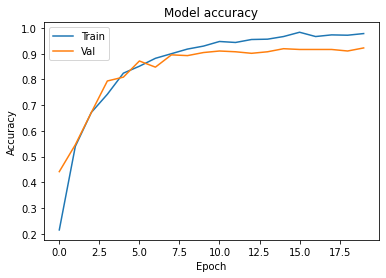

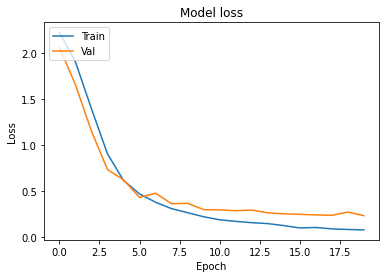

In [33]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.savefig("Accuracy.png")
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.savefig("Loss.png")
    plt.show()
    
plot_history(history)

In [14]:
#Layered sequential model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape = (X.shape[1],), use_bias=True, bias_initializer='ones'))
model.add(Dense(64, activation='relu', use_bias=True, bias_initializer='ones'))
model.add(Dense(32, activation='relu', use_bias=True, bias_initializer='ones'))
model.add(Dense(16, activation='relu', use_bias=True, bias_initializer='ones'))        
model.add(Dense(y.shape[1], activation='sigmoid', use_bias=True, bias_initializer='ones'))

my_optimizer = SGD(lr=0.1)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=2)

history = model.fit(X_train, y_train, validation_split=0.3, epochs=60, verbose=2, callbacks=[early_stopping_monitor])
history

score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])
print('Test loss:', score[0])

y_pred = model.predict(X_test)

Epoch 1/60
25/25 - 1s - loss: 2.3418 - accuracy: 0.1949 - val_loss: 1.9065 - val_accuracy: 0.3582
Epoch 2/60
25/25 - 0s - loss: 1.7305 - accuracy: 0.3564 - val_loss: 1.4847 - val_accuracy: 0.4149
Epoch 3/60
25/25 - 0s - loss: 1.3747 - accuracy: 0.4679 - val_loss: 1.1307 - val_accuracy: 0.5851
Epoch 4/60
25/25 - 0s - loss: 1.0406 - accuracy: 0.6090 - val_loss: 0.8263 - val_accuracy: 0.7343
Epoch 5/60
25/25 - 0s - loss: 0.6978 - accuracy: 0.8269 - val_loss: 0.5315 - val_accuracy: 0.8806
Epoch 6/60
25/25 - 0s - loss: 0.4415 - accuracy: 0.9026 - val_loss: 0.3793 - val_accuracy: 0.8955
Epoch 7/60
25/25 - 0s - loss: 0.3158 - accuracy: 0.9154 - val_loss: 0.3200 - val_accuracy: 0.9254
Epoch 8/60
25/25 - 0s - loss: 0.2129 - accuracy: 0.9513 - val_loss: 0.2782 - val_accuracy: 0.9224
Epoch 9/60
25/25 - 0s - loss: 0.1508 - accuracy: 0.9744 - val_loss: 0.2342 - val_accuracy: 0.9343
Epoch 10/60
25/25 - 0s - loss: 0.1084 - accuracy: 0.9846 - val_loss: 0.2337 - val_accuracy: 0.9343
Epoch 11/60
25/25 -

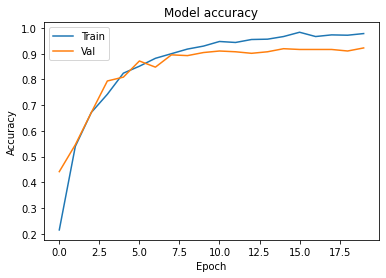

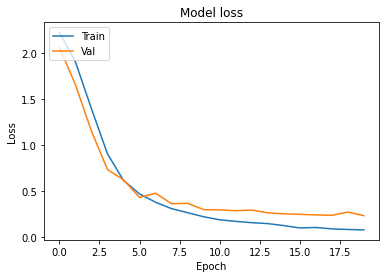

In [34]:
plot_history(history)

In [16]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Conv2D, MaxPooling2D

In [17]:
train_X, test_X, train_y, test_y = train_test_split(np.array(X).reshape((1593,16,16,-1)),\
                                                    np.array(y).reshape((1593,10)) ,test_size = 0.3, random_state=555,\
                                                   stratify=np.array(y).reshape((1593,10)))

In [18]:
#CNN
model = Sequential()
model.add(Conv2D(16, input_shape=(16, 16, 1),kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu' ))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
my_optimizer = SGD(lr=0.1) #optimizer='adam'
model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy']) #Nadam is a more stable optimizer
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)              

In [19]:
#train_X, test_X, train_y, test_y
history = model.fit(train_X, train_y, epochs=20, batch_size=128, validation_split=0.3, shuffle=False)

Epoch 1/20
7/7 [==============================] - 2s 68ms/step - loss: 2.2702 - accuracy: 0.1557 - val_loss: 2.0693 - val_accuracy: 0.4418
Epoch 2/20
7/7 [==============================] - 0s 35ms/step - loss: 1.9791 - accuracy: 0.4990 - val_loss: 1.6594 - val_accuracy: 0.5463
Epoch 3/20
7/7 [==============================] - 0s 36ms/step - loss: 1.5064 - accuracy: 0.6302 - val_loss: 1.1533 - val_accuracy: 0.6716
Epoch 4/20
7/7 [==============================] - 0s 35ms/step - loss: 0.9990 - accuracy: 0.7076 - val_loss: 0.7337 - val_accuracy: 0.7940
Epoch 5/20
7/7 [==============================] - 0s 36ms/step - loss: 0.6718 - accuracy: 0.8059 - val_loss: 0.6224 - val_accuracy: 0.8090
Epoch 6/20
7/7 [==============================] - 0s 36ms/step - loss: 0.5261 - accuracy: 0.8259 - val_loss: 0.4301 - val_accuracy: 0.8716
Epoch 7/20
7/7 [==============================] - 0s 36ms/step - loss: 0.3968 - accuracy: 0.8778 - val_loss: 0.4762 - val_accuracy: 0.8478
Epoch 8/20
7/7 [===========

In [20]:
score = model.evaluate(test_X, test_y)
print('Test accuracy:', score[1])
print('Test loss:', score[0]) 

15/15 [==============================] - 0s 6ms/step - loss: 0.1834 - accuracy: 0.9477
Test accuracy: 0.9476987719535828
Test loss: 0.18335029482841492


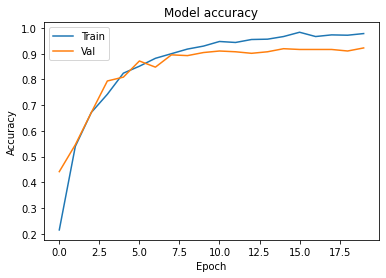

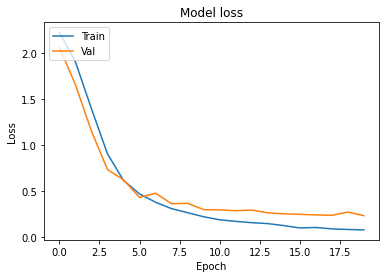

In [35]:
plot_history(history)

In [36]:
y_pred = model.predict(test_X)

In [37]:
preds = np.argmax(y_pred, axis = 1)

In [38]:
preds

array([4, 1, 5, 7, 1, 6, 1, 5, 7, 1, 3, 7, 4, 0, 8, 4, 5, 8, 7, 9, 4, 3,
       5, 1, 6, 0, 0, 2, 9, 4, 6, 0, 9, 5, 0, 8, 1, 8, 8, 8, 7, 0, 5, 6,
       0, 3, 4, 0, 4, 3, 4, 9, 7, 2, 3, 8, 8, 5, 8, 4, 4, 6, 1, 8, 0, 0,
       9, 1, 6, 8, 6, 3, 3, 2, 1, 6, 9, 6, 0, 8, 5, 1, 2, 9, 0, 3, 5, 7,
       1, 1, 3, 6, 0, 9, 2, 6, 6, 8, 2, 1, 1, 6, 4, 1, 4, 3, 6, 5, 6, 3,
       3, 3, 0, 0, 1, 9, 9, 5, 4, 7, 2, 6, 9, 2, 0, 1, 4, 5, 3, 6, 1, 9,
       6, 4, 9, 9, 5, 5, 9, 8, 6, 4, 3, 4, 5, 0, 1, 9, 4, 9, 2, 8, 2, 0,
       8, 2, 7, 5, 2, 6, 0, 8, 4, 5, 7, 1, 3, 7, 6, 8, 0, 5, 9, 8, 3, 1,
       0, 7, 2, 4, 1, 1, 4, 6, 9, 9, 0, 0, 0, 5, 9, 4, 3, 1, 5, 9, 4, 7,
       6, 0, 2, 0, 0, 4, 1, 7, 8, 4, 3, 5, 5, 2, 0, 7, 8, 5, 6, 1, 2, 7,
       1, 6, 2, 1, 1, 5, 9, 7, 2, 9, 2, 6, 0, 5, 3, 6, 1, 8, 2, 3, 3, 3,
       4, 0, 4, 4, 9, 0, 1, 1, 5, 6, 5, 4, 6, 4, 7, 9, 3, 4, 8, 1, 3, 6,
       5, 9, 0, 3, 8, 8, 5, 1, 9, 9, 9, 4, 4, 1, 2, 7, 0, 1, 6, 4, 0, 3,
       1, 7, 5, 6, 1, 1, 0, 1, 2, 2, 1, 8, 7, 3, 1,

In [39]:
#Filtering the data for only 2 classes 
Y_cat = np.argmax(y,axis=1)
X_a = X[np.logical_or(Y_cat==3 , Y_cat==4)]
Y_a = y[np.logical_or(Y_cat==3 , Y_cat==4)]
X_train, X_test, y_train, y_test = train_test_split(X_a, Y_a, test_size = 0.3, random_state=2)

### Auto Encoders

In [42]:
import keras
from keras import layers

encoding_dim = 900
input_img = keras.Input(shape=(256,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
encoded = layers.Dense(900, activation='relu')(encoded)
decoded = layers.Dense(256, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)

In [43]:
# This is our encod
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [44]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [45]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
1/1 [==============================] - 1s 705ms/step - loss: 0.7045 - val_loss: 0.6538
Epoch 2/50
1/1 [==============================] - 0s 133ms/step - loss: 0.6523 - val_loss: 0.6102
Epoch 3/50
1/1 [==============================] - 0s 122ms/step - loss: 0.6071 - val_loss: 0.5720
Epoch 4/50
1/1 [==============================] - 0s 127ms/step - loss: 0.5661 - val_loss: 0.5543
Epoch 5/50
1/1 [==============================] - 0s 114ms/step - loss: 0.5435 - val_loss: 0.5460
Epoch 6/50
1/1 [==============================] - 0s 131ms/step - loss: 0.5299 - val_loss: 0.5268
Epoch 7/50
1/1 [==============================] - 0s 118ms/step - loss: 0.5073 - val_loss: 0.5022
Epoch 8/50
1/1 [==============================] - 0s 130ms/step - loss: 0.4811 - val_loss: 0.4814
Epoch 9/50
1/1 [==============================] - 0s 117ms/step - loss: 0.4594 - val_loss: 0.4665
Epoch 10/50
1/1 [==============================] - 0s 130ms/step - loss: 0.4436 - val_loss: 0.4557
Epoch 11/50
1/1 [==

In [46]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

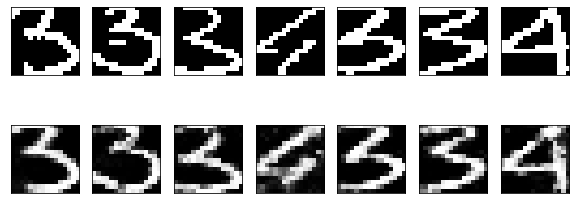

In [48]:
def plotnums(n):
    plt.figure(figsize=(10, 4))
    for i in range(n):
        """
        Takes in one integer n 
        Then plots the numbers showing the orginal and the encoded. 
        """
        
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(X_test[i].reshape(16, 16))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(16, 16))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.savefig("Autoencoder.png")    
    plt.show()
    
plotnums(7)    